## *Import the libraries*

In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
missing_values = ["n/a", "?", "na", "--"]
df = pd.read_csv('C:/Users/Md Monir/Documents/Jupyter Lab/DataSets/heart diseases.csv',na_values = missing_values)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [41]:
df['num'].replace({
    2: 1,
    3: 1,
    4: 1
}, inplace=True)

In [44]:
df = df.rename(columns={'num': 'heartdisease'})
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [45]:
# ca: number of major vessels (0-3) colored by flourosopy
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
import math
ca_null_value = math.ceil(df.ca.mean())
ca_null_value

1

In [46]:
thal_null_value = math.ceil(df.thal.mean())
thal_null_value

5

In [47]:
df.ca.fillna(ca_null_value, inplace = True)
df.thal.fillna(thal_null_value, inplace = True)

In [48]:
df.isnull().sum() 

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
heartdisease    0
dtype: int64

In [49]:
X = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

## *Train-Test split*

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

## *SVM classifier*

In [51]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

## *Logistic Classifier*

In [52]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression()
lrmodel.fit(X_train, y_train)

y_pred_logistic = lrmodel.decision_function(X_test)

F:\Anaconta_installer\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# make predictions on training data
lrmodel_pred_train = lrmodel.predict(X_train)
print('\nTaining Accuracy : ', accuracy_score(y_train,lrmodel_pred_train))
# make predictions on testing data
lrmodel_pred_test = lrmodel.predict(X_test)
print('\nTest Accuracy : ', accuracy_score(y_test,lrmodel_pred_test))


Taining Accuracy :  0.859504132231405

Test Accuracy :  0.8032786885245902


## *Plot ROC and compare AUC*
For more info visit: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

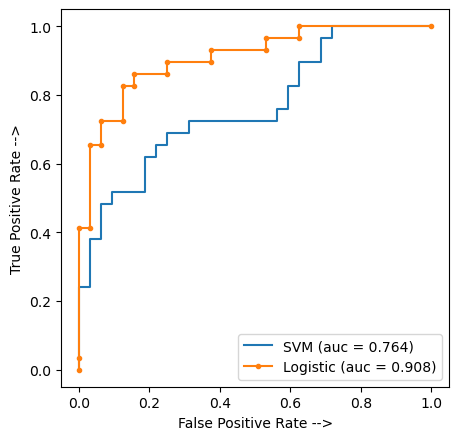

In [54]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()